# Dike Model Analysis

In [10]:
# import libraries
from ema_workbench import load_results
from ema_workbench.analysis import plotting, plotting_util, pairs_plotting
from ema_workbench.analysis import prim

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Visual Analysis

In [89]:
experiments, outcomes = load_results('./results/prim_problem2.tar.gz')

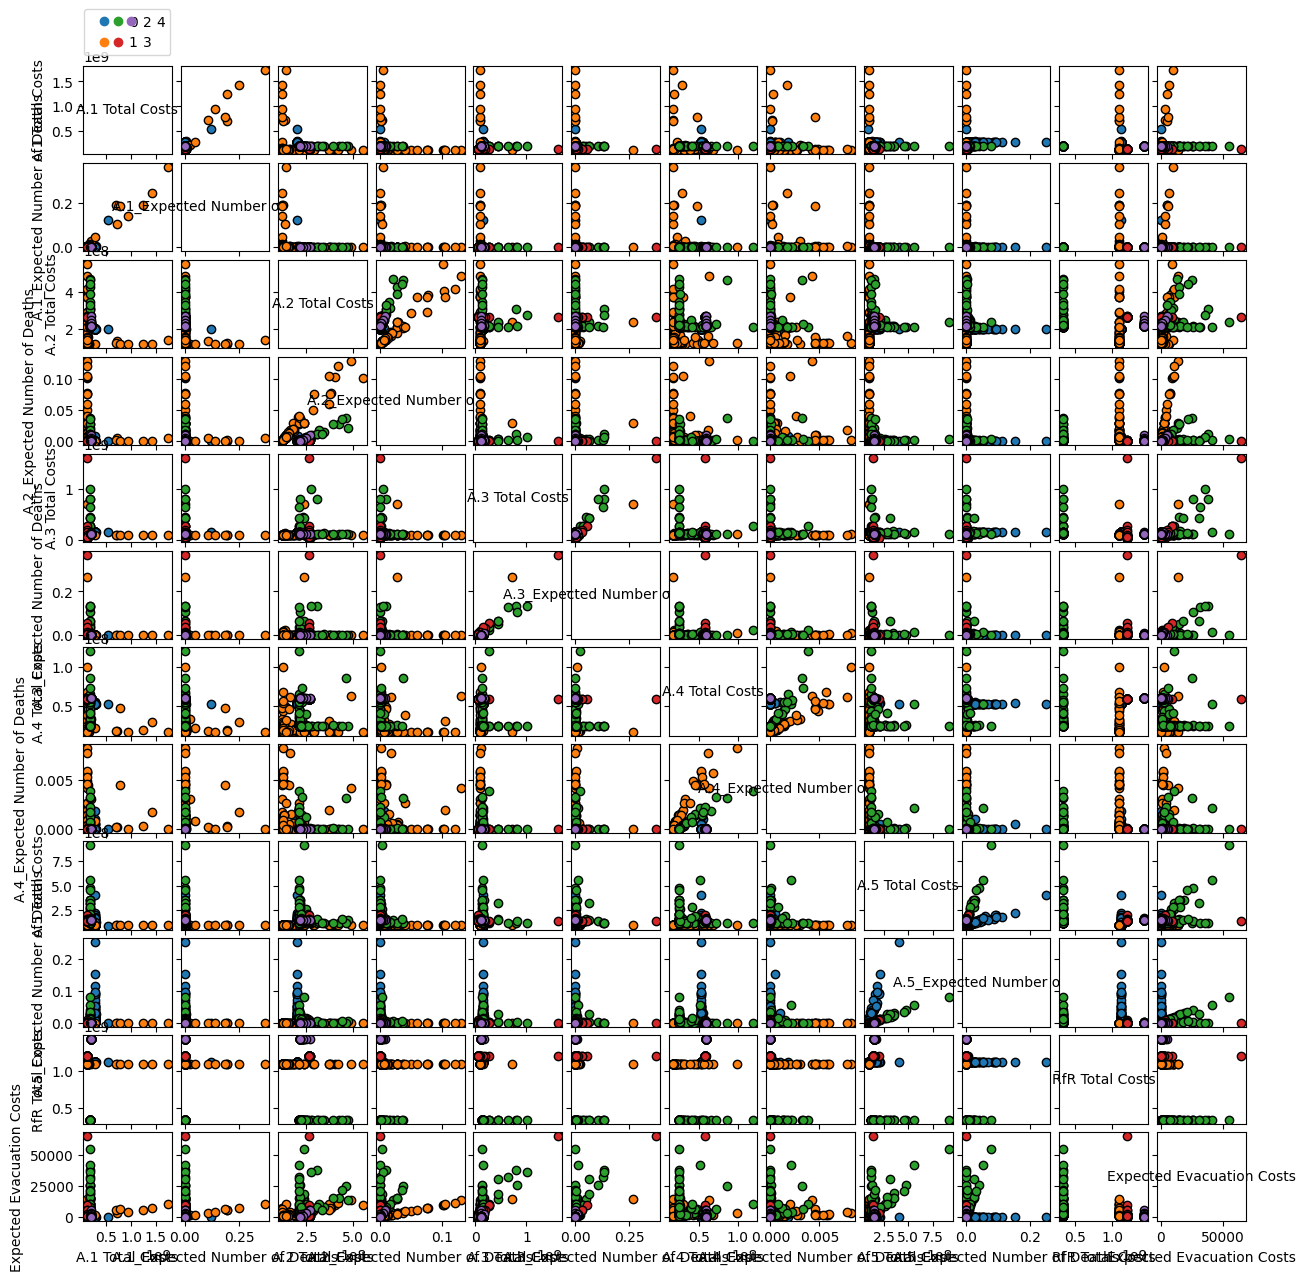

In [3]:
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

## Scenario discovery

In [90]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,105,269.482892,1.0,0.262423,232.292773,1.5,0.003461,167.846680,10.0,0.267520,...,10,6,4,8,8,3,0,5,0,dikesnet
1,113,196.680576,1.5,0.826220,316.298786,10.0,0.135710,85.068709,10.0,0.799330,...,10,6,4,8,8,3,0,6,0,dikesnet
2,96,122.164710,1.5,0.681596,344.933168,1.0,0.268368,343.464862,1.5,0.886185,...,10,6,4,8,8,3,0,7,0,dikesnet
3,24,201.756743,1.0,0.562300,120.654032,1.0,0.671460,275.046493,1.0,0.742591,...,10,6,4,8,8,3,0,8,0,dikesnet
4,116,329.828999,1.0,0.383590,230.346202,1.0,0.491169,322.975907,1.0,0.293323,...,10,6,4,8,8,3,0,9,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,56.897137,10.0,0.476066,274.032383,1.5,0.027449,74.960281,1.0,0.398714,...,2,10,10,0,3,6,1,1000,4,dikesnet
4996,42,43.532943,1.5,0.559624,218.493942,1.0,0.167623,301.112986,1.5,0.435107,...,2,10,10,0,3,6,1,1001,4,dikesnet
4997,8,148.321277,10.0,0.586224,319.967139,1.0,0.466653,252.977002,1.0,0.627327,...,2,10,10,0,3,6,1,1002,4,dikesnet
4998,59,163.852972,10.0,0.289518,172.469928,10.0,0.546327,81.686775,10.0,0.353468,...,2,10,10,0,3,6,1,1003,4,dikesnet


In [91]:
# clean up experiments
X = experiments.iloc[:, 0:50]

In [92]:
outcomes.keys()

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths'])

In [125]:
outcome_to_study = 'Expected Annual Damage'
percentile = 50

In [126]:
# Calculate the threshold
threshold = np.percentile(outcomes[outcome_to_study], percentile) 
# Show threshold
print(f"The threshold for {percentile}% worst outcomes for {outcome_to_study} equals {threshold}.")

The threshold for 50% worst outcomes for Expected Annual Damage equals 2238611.7795955697.


In [127]:
# Get column to optimise
opt = outcomes[outcome_to_study]
# To dataframe
opt = pd.DataFrame(opt)

In [128]:
opt

,0
0,4.359138e+07
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
4995,8.691888e+07
4996,2.345231e+07
4997,3.702576e+08
4998,2.952053e+08


In [129]:
opt[outcome_to_study] = np.where(opt[0] < threshold, 1, 0)

In [130]:
opt

,0,Expected Annual Damage
0,4.359138e+07,0
1,0.000000e+00,1
2,0.000000e+00,1
3,0.000000e+00,1
4,0.000000e+00,1
...,...,...
4995,8.691888e+07,0
4996,2.345231e+07,0
4997,3.702576e+08,0
4998,2.952053e+08,0


In [131]:
y = opt[outcome_to_study].to_numpy()

In [132]:
y

array([0, 1, 1, ..., 0, 0, 0])

In [133]:
# Define PRIM
sd_alg = prim.Prim(x=X, y=y, threshold=0.9, peel_alpha=0.05)

In [134]:
box = sd_alg.find_box()

/Users/milanmoleman/PycharmProjects/EPA141A-labs/venv/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


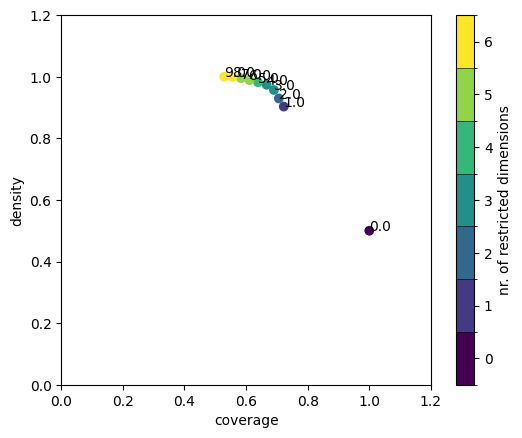

In [135]:
box.show_tradeoff(annotated=True)
plt.show()